In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=50

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\nasut\\OneDrive\\Documents\\Kuliah\\Semester 7\\PKKM\\BMKG\\Project\\MONAS-Dashboard\\Modelling'

In [13]:
df = pd.read_csv('../../Data/data_fix_rh.txt')
df

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,rh_obs
1,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,85.0
2,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,90.0
3,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,93.0
4,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,89.0
5,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544267,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,65.0
544268,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,57.0
544269,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,69.0
544270,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,71.0


In [14]:
df_input_ina_nwp = pd.read_csv('../../Data/MONAS-input_nwp_compile.csv')
df_input_ina_nwp

,lokasi,Date,suhu2m(degC),dew2m(degC),rh2m(%),wspeed(m/s),wdir(deg),lcloud(%),mcloud(%),hcloud(%),surpre(Pa),clmix(kg/kg),wamix(kg/kg),outlr(W/m2),pblh(m),lifcl(m),cape(j/kg),mdbz,t950(degC),rh950(%),ws950(m/s),wd950(deg),t800(degC),rh800(%),ws800(m/s),wd800(deg),t500(degC),rh500(%),ws500(m/s),wd500(deg),prec_nwp,LAT,LON,ELEV
0,96001,2023-10-17 15:00:00,27.4007,23.6856,80.3053,4.25554,191.08600,0.374474,1.000000,0.855219,100903.0,0.0,0.017137,180.376,526.076,616.078,406.014,13.7824,23.0678,74.5583,5.87159,191.4640,16.0404,73.3359,8.18965,242.5890,-4.71925,94.9932,4.68350,76.8328,2.923480e-19,5.87655,95.33785,126
1,96001,2023-10-17 18:00:00,27.4089,23.0971,77.4673,3.20000,228.61600,0.262561,1.000000,0.872848,100735.0,0.0,0.016653,196.935,491.829,689.544,287.453,19.0351,23.3155,71.6113,4.21652,217.4370,15.9013,73.9679,6.67126,204.7110,-4.99763,95.7026,4.83021,124.4510,1.034630e-19,5.87655,95.33785,126
2,96001,2023-10-17 21:00:00,27.3820,23.8747,81.3127,6.43993,224.35900,0.431500,1.000000,0.849396,100655.0,0.0,0.017185,232.870,558.189,618.759,620.873,0.0000,22.9912,75.4084,8.67978,222.8060,15.6937,73.0260,5.34901,203.9090,-5.10086,95.3166,4.00113,107.2340,0.000000e+00,5.87655,95.33785,126
3,96001,2023-10-18 00:00:00,27.4679,23.7839,80.4639,6.91585,220.91600,0.317385,1.000000,0.524404,100769.0,0.0,0.016910,233.885,532.027,644.846,428.753,0.0000,22.9836,77.4899,8.76241,220.2100,15.4617,74.9905,4.76448,191.2090,-4.39951,84.1607,3.31394,114.2420,0.000000e+00,5.87655,95.33785,126
4,96001,2023-10-18 03:00:00,27.9673,23.2775,75.7992,6.28717,214.11300,0.252877,0.785813,0.610115,100950.0,0.0,0.016377,268.016,700.017,786.830,229.671,0.0000,23.1852,76.8484,7.11073,212.3090,14.9336,76.5370,3.94272,217.0360,-4.74009,86.5560,3.79705,166.5850,0.000000e+00,5.87655,95.33785,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,99992,2023-10-20 00:00:00,26.8513,19.0878,62.5816,1.52901,146.67200,0.051358,0.210951,0.000000,100571.0,0.0,0.013547,287.580,424.941,2139.000,-0.100,0.0000,23.6648,65.5740,5.75998,100.6410,15.3491,71.3439,9.53871,94.4738,-4.78717,37.3070,3.18159,304.7020,0.000000e+00,-6.30253,106.75636,41
4148,99992,2023-10-20 03:00:00,32.5296,17.3364,40.4115,2.83196,76.91420,0.000000,0.227088,0.000000,100550.0,0.0,0.012277,304.315,1399.820,1910.010,-0.100,0.0000,26.7487,51.9330,3.24100,85.2487,15.5818,60.1363,10.88190,99.9526,-4.34492,31.4119,2.67764,274.8970,0.000000e+00,-6.30253,106.75636,41
4149,99992,2023-10-20 06:00:00,33.2196,21.2222,49.5108,6.39935,10.12190,0.000000,0.495652,0.000000,100316.0,0.0,0.015354,301.166,1036.540,1510.300,1030.700,0.0000,27.3323,60.4585,7.04615,15.0992,15.9853,67.9167,6.33450,121.2080,-4.53275,34.5896,2.30676,282.9150,3.250240e-03,-6.30253,106.75636,41
4150,99992,2023-10-20 09:00:00,31.2358,21.8844,57.6837,5.41735,1.79568,0.000000,0.589733,0.000000,100266.0,0.0,0.015657,295.828,978.651,1278.150,761.442,0.0000,26.0223,68.4350,6.25955,16.7635,15.8179,74.5408,7.09150,106.4220,-4.10275,29.5415,2.16724,244.8240,1.239780e-05,-6.30253,106.75636,41


In [16]:
print(df.columns, len(df.columns))
print(df_input_ina_nwp.columns, len(df_input_ina_nwp.columns))
# Drop ['Date', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.', 'hari', 'UTC', 'LAT', 'LON']

Index(['Date', 'lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.',
       'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.',
       'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.',
       'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.',
       'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.',
       't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.',
       'rh500...', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC', 'LAT', 'LON',
       'ELEV', 'rh_obs'],
      dtype='object') 39
Index(['lokasi', 'Date', 'suhu2m(degC)', 'dew2m(degC)', 'rh2m(%)',
       'wspeed(m/s)', 'wdir(deg)', 'lcloud(%)', 'mcloud(%)', 'hcloud(%)',
       'surpre(Pa)', 'clmix(kg/kg)', 'wamix(kg/kg)', 'outlr(W/m2)', 'pblh(m)',
       'lifcl(m)', 'cape(j/kg)', 'mdbz', 't950(degC)', 'rh950(%)',
       'ws950(m/s)', 'wd950(deg)', 't800(degC)', 'rh800(%)', 'ws800(m/s)',
       'wd800(deg)', 't500(degC)', 'rh500(%)', 'ws500(m/s)', 'wd50

In [17]:
X = df.drop(columns=['rh_obs','Date', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.', 'hari', 'UTC', 'LAT', 'LON']) 
y = df['rh_obs']

In [18]:
input_ina_nwp = df_input_ina_nwp.drop(columns=[ 'prec_nwp', 'LAT', 'LON'])

In [21]:
train = X[:int(X.shape[0] * 0.8)]
y_tr = y[:int(y.shape[0] * 0.8)]
# test = X[int(X.shape[0] * 0.9):int(X.shape[0] * 0.95)]
val = X[int(X.shape[0] * 0.8):]
y_val = y[int(y.shape[0] * 0.8):]

In [22]:
print(f'Train size : {train.shape[0]}')
# print(f'Test size : {test.shape[0]}')
print(f'Validation size : {val.shape[0]}')

Train size : 435416
Validation size : 108855


In [23]:
X_train, X_test, y_train, y_test = train_test_split(train, y_tr, test_size=0.1, random_state=42, shuffle=False)

In [24]:
from xgboost import XGBRegressor
# import xgboost

In [25]:
X_train

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
1,96001,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.000000,0.000000,100564.0,0.000000e+00,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,126
2,96001,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.000000,0.000000,100481.0,0.000000e+00,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,126
3,96001,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.000000,0.000000,100265.0,0.000000e+00,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,126
4,96001,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.000000,0.000000,100462.0,0.000000e+00,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,126
5,96001,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.000000,0.000000,100667.0,0.000000e+00,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391870,97236,26.4389,23.5999,84.5435,6.03158,130.7890,0.830345,0.844728,0.203429,100081.0,1.180300e-05,0.017583,282.042,615.565,380.883,749.32000,0.0,21.9417,95.6201,9.49228,128.6220,14.2503,94.5899,5.906860,104.9450,-4.81596,70.6114,7.03990,82.0400,25
391871,97236,25.7509,23.2250,86.0894,4.80729,126.3900,0.772281,0.765850,0.120673,100050.0,1.432800e-05,0.017363,277.775,604.065,405.328,501.29500,0.0,22.1600,92.7169,9.76772,124.3450,14.5623,92.7920,4.824370,104.9910,-4.55094,67.6037,7.35052,87.5906,25
391872,97236,23.9570,21.8922,88.3833,3.07839,76.5107,0.931197,0.755701,0.174986,100173.0,1.626290e-05,0.016720,272.842,374.984,391.229,205.19900,0.0,21.4610,97.8854,8.37418,128.6690,14.7560,90.5543,3.792200,94.7513,-5.29697,71.7034,6.35654,85.0998,25
391873,97236,25.3205,22.4543,84.2929,3.98045,109.6560,0.678044,0.594871,0.000147,100121.0,3.198050e-07,0.016630,276.534,521.283,413.628,199.47200,0.0,21.7198,91.5089,10.20980,118.4460,14.6897,86.9928,3.354980,118.1880,-4.92604,63.1848,7.29206,73.6982,25


In [26]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
# scaler = StandardScaler()

In [16]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [17]:
# X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [18]:
# X_train_scaled

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
0,-1.567050,-0.367904,-0.092346,0.385602,-0.590669,-0.937480,0.625429,-1.719115,-0.170774,-1.699332,...,-1.780183,2.266744,-4.603036,-1.327922,1.020496,-0.102914,-2.848932,0.337814,-0.997147,0.135161
1,-1.567050,-0.367904,-0.092346,0.248673,-0.638038,-0.832280,0.385352,-1.569914,0.148435,-1.699332,...,-1.636236,2.741735,-4.882719,-1.367044,0.690255,0.099390,-2.769826,0.244652,-0.970098,0.135161
2,-1.567050,-0.367904,-0.092346,0.092879,-0.687359,-0.706562,-0.241600,-1.467886,0.430446,-1.699332,...,-1.552309,2.570701,-4.913946,-1.308522,0.432347,0.315910,-2.645758,0.635915,-0.887266,0.135161
3,-1.567050,-0.367904,-0.092346,0.052220,-0.625431,-0.618415,-0.129436,-1.641184,0.358975,-1.699332,...,-1.664022,1.988765,-4.780067,-1.422601,-0.719450,0.556596,-2.593726,0.819832,-0.907892,0.135161
4,-1.567050,-0.367904,-0.092346,0.147819,-0.715580,-0.784096,-0.055960,-1.695551,0.095238,-1.699332,...,-1.663755,1.923358,-4.776314,-1.010711,-0.533079,0.664774,-2.459385,1.327585,-0.817635,0.135161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391872,1.638502,0.066162,-0.083629,-0.194978,0.263395,0.363525,1.483917,-0.569544,0.631793,0.690099,...,-0.615824,-1.067293,1.005819,0.068945,-0.882442,0.788810,-0.081571,0.748578,-0.658565,-0.311781
391873,1.638502,-0.355722,-0.092345,-0.827571,-0.439648,0.558735,0.403708,-1.072825,1.215503,0.658435,...,-0.570758,-0.811863,0.832301,-0.286429,-0.992760,-0.222274,0.119179,0.386377,-0.686671,-0.311781
391874,1.638502,-0.367684,-0.092346,-0.346752,-0.143144,0.210643,0.967311,-0.738389,0.285653,0.156649,...,-0.677304,-0.899292,0.556130,-0.436963,-0.740264,0.280442,-0.297952,0.727276,-0.815322,-0.311781
391875,1.638502,-0.242485,-0.092346,0.245288,0.265030,-0.156077,2.345423,-0.522686,0.620550,0.385999,...,-0.570571,-1.171205,0.918436,-0.073388,-1.009573,0.173144,-0.142021,0.745674,-0.823170,-0.311781


In [27]:
X_train.describe()

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
count,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000,391874.000000
mean,96604.736431,26.303834,22.725670,81.817578,2.432244,182.835991,0.600272,0.544660,0.374762,99542.142478,0.000004,0.017036,231.974114,524.524366,685.279513,979.471061,1.617609,23.730929,83.320639,3.950733,183.432457,15.371667,79.820817,4.624120,186.899236,-5.132965,69.269470,5.296224,145.955484,95.456364
std,385.268396,2.835789,1.895766,11.750945,1.600520,99.108271,0.272251,0.320516,0.292709,2629.496256,0.000032,0.001554,54.734461,337.859379,310.644003,729.649329,5.689031,1.375256,9.598225,2.526421,95.949441,0.758329,12.896006,2.904478,92.820339,0.737855,20.421991,2.744280,88.624476,225.981315
min,96001.000000,13.537600,5.484120,30.371400,0.003070,0.001434,0.000000,0.000000,0.000000,86506.700000,0.000000,0.006845,0.000000,0.000000,85.573600,-0.100000,0.000000,17.701100,23.638900,0.011173,0.003052,11.560900,2.012670,0.013711,0.168555,-8.813010,0.000047,0.089455,0.277085,0.000000
25%,96207.000000,24.200825,21.949200,73.721900,1.231302,101.683250,0.424349,0.302483,0.070475,99596.700000,0.000000,0.016203,196.421000,252.048750,472.719000,304.083750,0.000000,22.821600,77.534725,2.045905,106.245250,14.862500,74.088800,2.504930,99.300675,-5.615930,58.492875,3.198658,80.841225,4.000000
50%,96651.000000,26.423250,23.143600,82.890250,2.100110,184.054500,0.635169,0.574958,0.369951,100511.000000,0.000000,0.017304,253.645500,479.169500,640.596500,918.179500,0.000000,23.586500,84.544900,3.441480,178.939500,15.342250,82.313650,4.034095,201.179500,-5.142565,73.458200,4.923855,107.747000,15.000000
75%,96939.000000,28.452400,24.016700,91.157400,3.298027,265.310000,0.810405,0.815215,0.623163,100782.000000,0.000000,0.018138,273.816750,741.812000,839.543000,1550.667500,0.000000,24.485075,90.367450,5.335770,267.129750,15.852400,88.576900,6.069327,268.335750,-4.662813,84.729200,6.999937,222.663000,43.000000
max,97236.000000,36.192300,27.035500,100.000000,13.853000,359.998000,1.000000,1.000000,1.000000,101575.000000,0.000747,0.021486,334.006000,2109.870000,4254.590000,3994.070000,61.157700,31.561600,100.000000,22.464300,359.998000,19.818500,100.000000,25.172400,359.799000,-1.583760,100.000000,23.730800,359.682000,1420.000000


In [28]:
# X_train_scaled.describe()

In [29]:
y_train

1         85.0
2         90.0
3         93.0
4         89.0
5         71.0
          ... 
391870    88.0
391871    93.0
391872    95.0
391873    92.0
391874    80.0
Name: rh_obs, Length: 391874, dtype: float64

In [30]:
model = XGBRegressor( verbosity=2, n_jobs=-1, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003)

In [31]:
model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 2,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 6601,
 'reg_alpha': 0.3,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 13.200000000000003,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 2}

In [32]:
model.fit(X_train, y_train)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=160, n_jobs=-1,
             num_parallel_tree=None, random_state=6601, ...)

In [33]:
y_pred = model.predict(X_test)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

Tanpa Scaling
Mean Squared Error: 68.49305004730348
Mean Absolute Error: 6.410849946065707
R2 Score: 0.5669285654746792



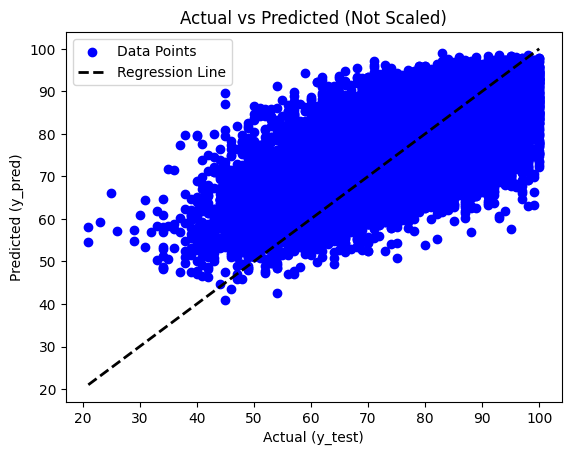

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Not Scaled)')
plt.legend()

plt.show()


In [36]:
# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred_scaled, c='blue', label='Data Points')

# #garis diagonal
# y_min = min(min(y_test), min(y_pred_scaled))
# y_max = max(max(y_test), max(y_pred_scaled))
# plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

# plt.xlabel('Actual (y_test)')
# plt.ylabel('Predicted (y_pred)')

# plt.title('Actual vs Predicted (Scaled)')
# plt.legend()

# plt.show()


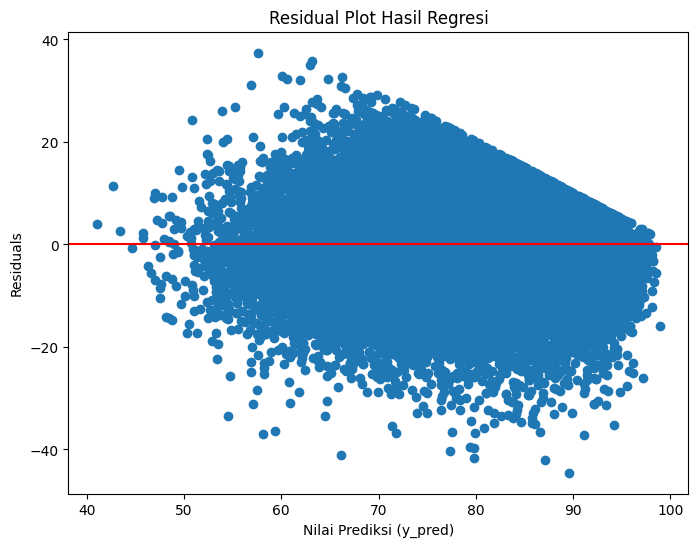

In [37]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Nilai Prediksi (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot Hasil Regresi")
plt.show()

In [38]:
X_test.columns

Index(['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.',
       'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.',
       'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.',
       'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.',
       'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.',
       't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV'],
      dtype='object')

In [39]:
val

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
435417,97378,29.3753,16.3097,45.3375,10.170500,111.4960,0.000000,0.000000,0.000000,100052.0,0.0,0.011721,329.613,1359.560,1472.310,30.75450,0.0,22.6673,61.0197,13.55870,110.9590,12.6032,53.2107,13.24350,78.3113,-4.44909,1.25278,4.42916,229.975,141
435418,97378,29.8222,16.0221,43.3802,9.620180,110.2320,0.000000,0.000000,0.000000,99931.2,0.0,0.011503,328.776,1086.310,1583.480,9.27818,0.0,23.4889,55.1280,13.02750,108.1040,14.1490,51.3741,11.52180,73.2636,-4.33181,2.27077,4.26774,237.845,141
435419,97378,27.3410,17.3331,54.4635,9.375300,104.7090,0.000000,0.000000,0.000000,99972.4,0.0,0.012499,306.695,762.150,1235.810,13.55680,0.0,22.4653,67.2507,14.10260,102.4000,14.9304,45.4825,9.82500,69.9017,-4.20420,4.12294,3.63434,230.599,141
435420,97378,24.9314,20.5364,76.7173,7.142340,92.5274,0.713963,0.000000,0.000000,100262.0,0.0,0.015184,290.206,752.774,693.918,64.33350,0.0,21.3166,88.6548,15.33900,92.8010,14.1066,60.4210,12.02170,81.1958,-3.98435,18.36510,4.94887,294.620,141
435421,97378,24.3937,20.6126,79.5986,5.959310,90.8481,0.332491,0.000000,0.000000,100109.0,0.0,0.015274,289.271,767.042,684.612,155.38300,0.0,21.6551,83.2919,14.11570,89.4659,14.5303,56.3369,12.85770,83.9015,-4.19079,21.79230,6.11776,301.578,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544267,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.48475,260.4710,-4.69787,73.07580,2.29511,231.967,41
544268,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.01409,248.4170,-4.63960,75.79220,2.05083,268.579,41
544269,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.06828,248.2330,-4.40575,77.14890,2.52709,272.922,41
544270,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.67518,256.2960,-4.33471,76.31700,3.07955,259.250,41


In [40]:
y_val

435417    52.0
435418    55.0
435419    59.0
435420    73.0
435421    73.0
          ... 
544267    65.0
544268    57.0
544269    69.0
544270    71.0
544271    88.0
Name: rh_obs, Length: 108855, dtype: float64

In [41]:
y_val_pred = model.predict(val)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [42]:
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse_val}')
print(f'Mean Absolute Error: {mae_val}')
print(f'R2 Score: {r2_val}\n')

Tanpa Scaling
Mean Squared Error: 79.27457319317126
Mean Absolute Error: 6.981731617838935
R2 Score: 0.30793996400460866



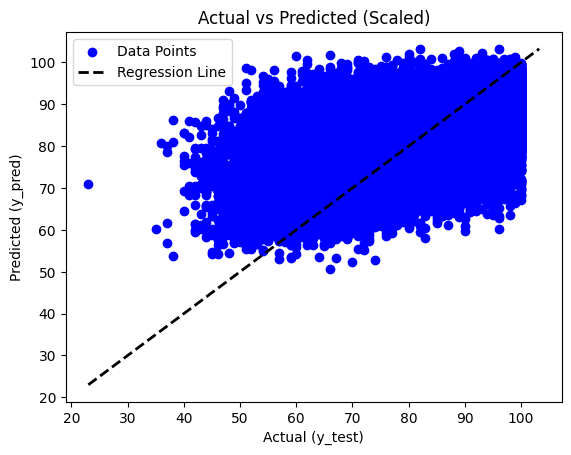

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_val_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_val), min(y_val_pred))
y_max = max(max(y_val), max(y_val_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Scaled)')
plt.legend()


In [44]:
#OUTPUT

combined = pd.concat([df[['Date', 'lokasi', 'rh2m...', 'LON','LAT','ELEV']],y_val, pd.Series(y_val_pred, index = val.index)], axis=1)
combined.columns = ['Date', 'lokasi', 'rh2m...', 'LON','LAT','ELEV', 'rh_obs', 'prediction']
combined = combined.dropna()
combined.tail(15)

,Date,lokasi,rh2m...,LON,LAT,ELEV,rh_obs,prediction
544257,2023-04-05 09:00:00,99992,72.0814,106.7564,-6.30253,41,53.0,73.149643
544258,2023-04-10 00:00:00,99992,87.5397,106.7564,-6.30253,41,91.0,89.482147
544259,2023-04-10 03:00:00,99992,65.5281,106.7564,-6.30253,41,88.0,69.346687
544260,2023-04-10 06:00:00,99992,63.5408,106.7564,-6.30253,41,68.0,67.130836
544261,2023-04-10 09:00:00,99992,67.7585,106.7564,-6.30253,41,65.0,70.715317
544262,2023-04-11 00:00:00,99992,86.8553,106.7564,-6.30253,41,84.0,91.764954
544263,2023-04-11 03:00:00,99992,63.6300,106.7564,-6.30253,41,62.0,68.346138
544264,2023-04-11 06:00:00,99992,62.8529,106.7564,-6.30253,41,61.0,62.106956
544265,2023-04-11 09:00:00,99992,69.0443,106.7564,-6.30253,41,72.0,66.997849
544266,2023-04-12 00:00:00,99992,83.9572,106.7564,-6.30253,41,88.0,91.296318


In [45]:
combined.head(15)

,Date,lokasi,rh2m...,LON,LAT,ELEV,rh_obs,prediction
435417,2021-09-08 03:00:00,97378,45.3375,123.0739,-10.76662,141,52.0,62.123367
435418,2021-09-08 06:00:00,97378,43.3802,123.0739,-10.76662,141,55.0,57.372478
435419,2021-09-08 09:00:00,97378,54.4635,123.0739,-10.76662,141,59.0,63.956394
435420,2021-09-08 15:00:00,97378,76.7173,123.0739,-10.76662,141,73.0,84.365906
435421,2021-09-08 18:00:00,97378,79.5986,123.0739,-10.76662,141,73.0,86.519508
435422,2021-09-08 21:00:00,97378,80.7293,123.0739,-10.76662,141,79.0,91.258949
435423,2021-09-09 00:00:00,97378,61.3605,123.0739,-10.76662,141,70.0,72.835144
435424,2021-09-09 03:00:00,97378,55.5156,123.0739,-10.76662,141,56.0,60.510769
435425,2021-09-09 06:00:00,97378,58.1329,123.0739,-10.76662,141,61.0,63.403877
435426,2021-09-09 09:00:00,97378,73.5604,123.0739,-10.76662,141,63.0,76.265701


In [46]:
combined.shape

(108855, 8)

In [47]:
combined_last_50 = combined.iloc[-50:]

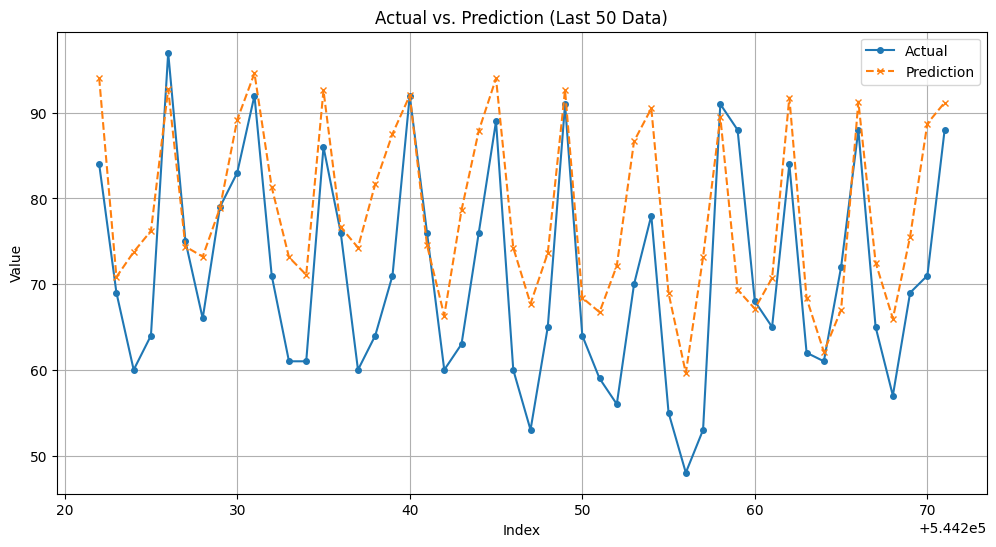

In [49]:
plt.figure(figsize=(12, 6))

plt.plot(combined_last_50.index, combined_last_50['rh_obs'], label='Actual', marker='o', markersize=4)
plt.plot(combined_last_50.index, combined_last_50['prediction'], label='Prediction', linestyle='--', marker='x', markersize=4)

plt.title('Actual vs. Prediction (Last 50 Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()

In [63]:
# Finalizing model
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=False)

final_model = XGBRegressor( verbosity=2, n_jobs=-1, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003)

final_model.fit(X_train_final, y_train_final)
y_pred_final = model.predict(X_test_final)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [64]:
# Test the final model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_final = mean_squared_error(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse_final}')
print(f'Mean Absolute Error: {mae_final}')
print(f'R2 Score: {r2_final}\n')

Tanpa Scaling
Mean Squared Error: 60.4655142882212
Mean Absolute Error: 5.871512386097968
R2 Score: 0.5319777869777111



In [68]:
# test prediction using ina_nwp_input
input_ina_nwp_filtered = input_ina_nwp.rename(
    columns={
        'suhu2m(degC)' : 'suhu2m.degC.',
        'dew2m(degC)' : 'dew2m.degC.',
        'rh2m(%)' : 'rh2m...',
        'wspeed(m/s)' : 'wspeed.m.s.',
        'wdir(deg)' : 'wdir.deg.',
        'lcloud(%)' : 'lcloud...',
        'mcloud(%)' : 'mcloud...' ,
        'hcloud(%)' : 'hcloud...',
        'surpre(Pa)' : 'surpre.Pa.' ,
        'clmix(kg/kg)' : 'clmix.kg.kg.' ,
        'wamix(kg/kg)' : 'wamix.kg.kg.' ,
        'outlr(W/m2)' : 'outlr.W.m2.' ,
        'pblh(m)' : 'pblh.m.',
        'lifcl(m)' : 'lifcl.m.' ,
        'cape(j/kg)' : 'cape.j.kg.' ,
        'mdbz' : 'mdbz' ,
        't950(degC)' : 't950.degC.' ,
        'rh950(%)' : 'rh950...',
        'ws950(m/s)' : 'ws950.m.s.' ,
        'wd950(deg)' : 'wd950.deg.' ,
        't800(degC)' : 't800.degC.' ,
        'rh800(%)' : 'rh800...' ,
        'ws800(m/s)' : 'ws800.m.s.',
        'wd800(deg)' : 'wd800.deg.' ,
        't500(degC)' : 't500.degC.' ,
        'rh500(%)' : 'rh500...' ,
        'ws500(m/s)' : 'ws500.m.s.' ,
        'wd500(deg)' : 'wd500.deg.',
})
output_humid_ina_nwp = final_model.predict(input_ina_nwp_filtered.drop(columns=['Date']))
output_humid_ina_nwp

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

array([80.202545, 83.056625, 86.7269  , ..., 56.297092, 65.63753 ,
       75.2918  ], dtype=float32)

In [71]:
#OUTPUT

output_df_pred = pd.concat([input_ina_nwp['Date'], input_ina_nwp_filtered[['lokasi', 'rh2m...']], pd.Series(output_humid_ina_nwp, index = input_ina_nwp_filtered.index)], axis=1)
output_df_pred.columns = ['Date','lokasi', 'rh2m...', 'prediction']
output_df_pred = output_df_pred.dropna()

In [72]:
output_df_pred

,Date,lokasi,rh2m...,prediction
0,2023-10-17 15:00:00,96001,80.3053,80.202545
1,2023-10-17 18:00:00,96001,77.4673,83.056625
2,2023-10-17 21:00:00,96001,81.3127,86.726898
3,2023-10-18 00:00:00,96001,80.4639,84.927826
4,2023-10-18 03:00:00,96001,75.7992,75.845688
...,...,...,...,...
4147,2023-10-20 00:00:00,99992,62.5816,78.465424
4148,2023-10-20 03:00:00,99992,40.4115,53.836456
4149,2023-10-20 06:00:00,99992,49.5108,56.297092
4150,2023-10-20 09:00:00,99992,57.6837,65.637527


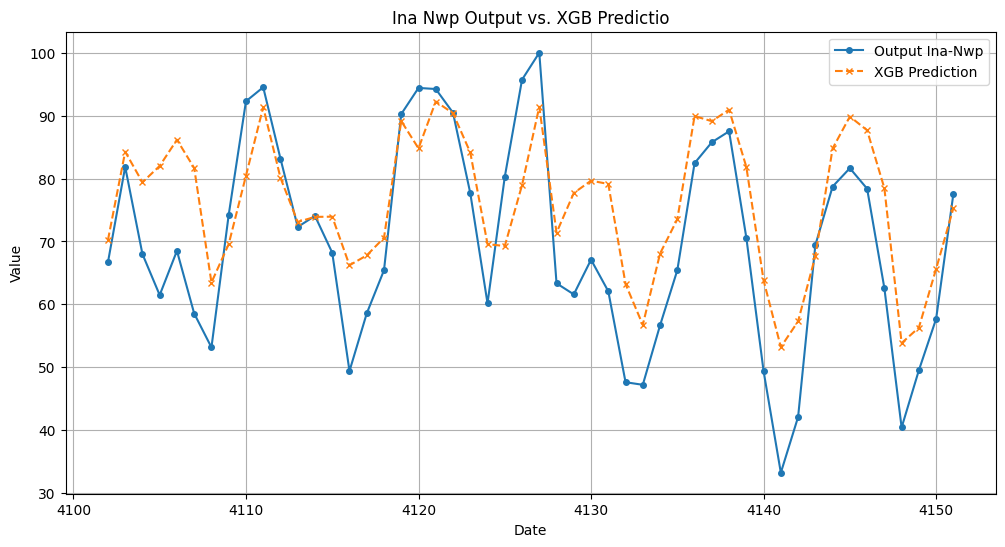

In [76]:
plt.figure(figsize=(12, 6))

plt.plot(output_df_pred.iloc[-50:].index, output_df_pred.iloc[-50:]['rh2m...'], label='Output Ina-Nwp', marker='o', markersize=4)
plt.plot(output_df_pred.iloc[-50:].index, output_df_pred.iloc[-50:]['prediction'], label='XGB Prediction', linestyle='--', marker='x', markersize=4)

plt.title('Ina Nwp Output vs. XGB Predictio')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()

In [50]:
model.save_model("humid_xgb_tuned_noShuffle.json")